<a href="https://colab.research.google.com/github/RazvanGolan/Faculty-3rd-year/blob/main/bia/lab2/exercises_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split

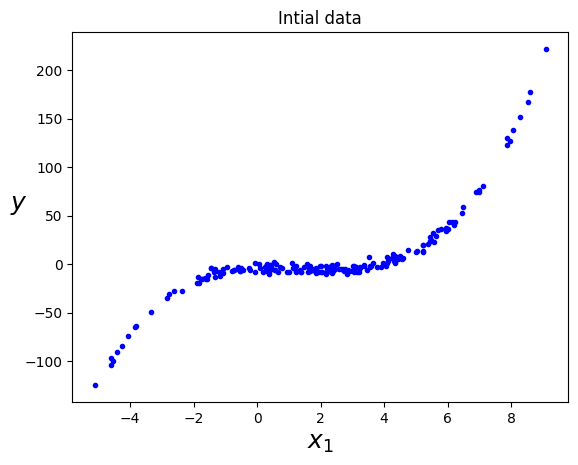

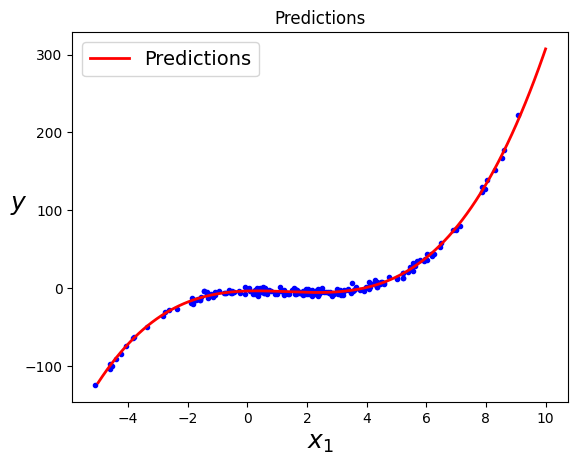

In [2]:
# exercise 1

X = (2 - 3 * np.random.normal(0, 1, 200)).reshape(200, 1)
y = 0.5*X**3 - 2* X**2 + X + np.random.normal(-3, 3, 200).reshape(-1, 1)

# plot the data
plt.title("Intial data")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

# add the polynomial to x
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)

# linear regression step
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# plot the predictions
X_test = np.linspace(-5, 10, 200).reshape(200, 1)
X_test_poly = poly_features.transform(X_test)
y_new = lin_reg.predict(X_test_poly)
plt.title("Predictions")
plt.plot(X, y, "b.")
plt.plot(X_test, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()

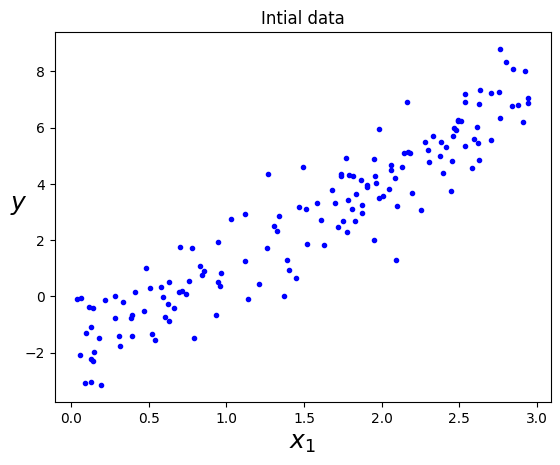

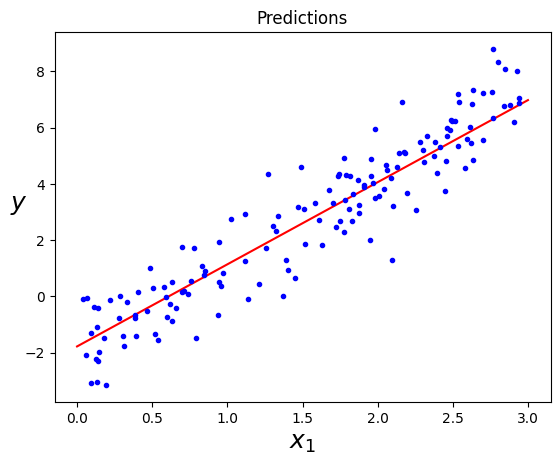

Weights value:
[2.91714488]
Bias value:
[-1.77823935]


In [17]:
# exercise 2

X = 3 * np.random.rand(150, 1)
y = -2 + 3 * X + np.random.randn(150, 1)

# plot the data
plt.title("Intial data")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

# hyperparameters
eta = 0.06  # learning rate
n_epochs = 15
batch_size = 10
n = X.size
alpha = 0.01
w = np.random.randn(2,1)  # random initialization

X_b = np.c_[np.ones((n, 1)), X]

# mini-batch gradient descent using ridge regression
for epoch in range(n_epochs):
  shuffled_indices = np.random.permutation(n)
  X_shuffled = X_b[shuffled_indices]
  y_shuffled = y[shuffled_indices]

  for i in range(0, n, batch_size):
    xi = X_shuffled[i:i+batch_size]
    yi = y_shuffled[i:i+batch_size]
    gradients = 1/batch_size * xi.T.dot(xi.dot(w) - yi) + alpha * w
    w = w - eta * gradients

X_new = np.linspace(0, 3, n).reshape(n, 1)
X_new_1 = np.c_[np.ones((n, 1)), X_new]  # add x0 = 1 to each instance
y_reg = X_new_1.dot(w)
plt.title("Predictions")
plt.plot(X_new, y_reg, "r-")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

print("Weights value:")
print(w[1])

print("Bias value:")
print(w[0])

In [6]:
# exercise 3

digits_dataset = datasets.load_digits()
print("Dataset data information visualization\n")
print(f'Dataset keys: {digits_dataset.keys()}')
print(f"Target names: {digits_dataset['target_names']}")
print(f"Feature names: {digits_dataset['feature_names']}")
print(f"Shape of the dataset: {digits_dataset['data'].shape}")
print(f"Shape of targets: {digits_dataset['target'].shape}\n")

X_train, X_test, y_train, y_test = train_test_split(digits_dataset['data'], digits_dataset['target'], test_size=0.35, random_state=0)
print(f"Shape of the training set: {X_train.shape}")
print(f"Shape of the testing set: {X_test.shape}")

softmax_reg = LogisticRegression(max_iter=700, solver="lbfgs", C=5)
# The multi_class="multinomial" option is suitable for problems where the target variable has three or more distinct categories.

softmax_reg.fit(X_train, y_train)
print(f"\nTest set accuracy: {softmax_reg.score(X_test, y_test)}\n")

print(f"Prediction for second example in test set: {softmax_reg.predict([X_test[1]])}")
print(f"Probabilities for it: \n{softmax_reg.predict_proba([X_test[1]])}")

Dataset data information visualization

Dataset keys: dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
Target names: [0 1 2 3 4 5 6 7 8 9]
Feature names: ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5